In [62]:
import pandas as pd
import numpy as np

In [63]:
data = pd.read_csv('/content/AirQualityUCI.csv')

In [66]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [67]:
data.tail()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9352,3/23/2005,4:00:00,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low
9356,4/4/2005,4:00:00,-200.0,864,-200,0.8,478,52,1116,43,958,489,11.8,56.0,0.7743,Very low


In [68]:
data.shape

(9357, 16)

In [69]:
data.loc[[9355]]

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9355,4/1/2005,4:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 1.1+ MB


In [71]:
data.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [72]:
data.isin([-200]).sum(axis=0)

Date               0
Time               0
CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
Nox_GT          1639
PT08_S3_Nox      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
CO_level           0
dtype: int64

Handling the  missing values
We can convert that missing values into NAN (not a number) & replace all the NAN with the mean of that particular coloumn

In [73]:
data = data.replace(to_replace = -200, value = np.NaN)
data.isnull().sum()

Date               0
Time               0
CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
Nox_GT          1639
PT08_S3_Nox      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
CO_level           0
dtype: int64

In [74]:
data.tail()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9352,3/23/2005,4:00:00,NaN,993.0,NaN,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,NaN,1122.0,NaN,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,NaN,883.0,NaN,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,NaN,818.0,NaN,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,Very low
9356,4/4/2005,4:00:00,NaN,864.0,NaN,0.8,478.0,52.0,1116.0,43.0,958.0,489.0,11.8,56.0,0.7743,Very low


In [75]:
data.mean()

<ipython-input-75-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


CO_GT              2.152750
PT08_S1_CO      1099.833166
NMHC_GT          218.811816
C6H6_GT           10.083105
PT08_S2_NMHC     939.153376
Nox_GT           246.896735
PT08_S3_Nox      835.493605
NO2_GT           113.091251
PT08_S4_NO2     1456.264598
PT08_S5_O3      1022.906128
T                 18.317829
RH                49.234201
AH                 1.025530
dtype: float64

Filling the data with the mean value

In [76]:
data = data.fillna(data.mean(numeric_only=True))
data.tail()


,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9352,3/23/2005,4:00:00,2.15275,993.0,218.811816,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,2.15275,1122.0,218.811816,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,2.15275,883.0,218.811816,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,2.15275,818.0,218.811816,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,Very low
9356,4/4/2005,4:00:00,2.15275,864.0,218.811816,0.8,478.0,52.0,1116.0,43.0,958.0,489.0,11.8,56.0,0.7743,Very low


In [77]:
data.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

**Applications** -
 Forecasting(Time stamp data is needed predicting in the mere future) & Regression(No time related data, basically used for predicting a number)  ---- stock market prediction

**Forecasting - FB Prophet Algorithm** (https://pypi.org/project/fbprophet/  & https://facebook.github.io/prophet/)      *Converting the date arrangement according to the PB algorithm*

In [79]:
# From DD/MM/YYYY to YYYY-MM-DD

date_info =pd.to_datetime(data['Date'])
print(date_info)

0      2004-11-23
1      2004-11-23
2      2004-11-17
3      2004-11-23
4      2004-11-26
          ...    
9352   2005-03-23
9353   2005-03-26
9354   2005-03-29
9355   2005-04-01
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [82]:
time_info = data['Time']
print(time_info)

0       19:00:00
1       20:00:00
2       18:00:00
3       18:00:00
4       18:00:00
          ...   
9352     4:00:00
9353     4:00:00
9354     4:00:00
9355     4:00:00
9356     4:00:00
Name: Time, Length: 9357, dtype: object


In [84]:
# Changing the alignment of time as well based on the model

time_info = time_info.apply(lambda x:x.replace('.',':'))
print(time_info)

0       19:00:00
1       20:00:00
2       18:00:00
3       18:00:00
4       18:00:00
          ...   
9352     4:00:00
9353     4:00:00
9354     4:00:00
9355     4:00:00
9356     4:00:00
Name: Time, Length: 9357, dtype: object


data types in pandas - data frames(tabled info) & series(one row one coloumn)

In [85]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [88]:
# Combining the 2 sereis

date_time = pd.concat([date_info, time_info], axis = 1)
date_time.head()

,Date,Time
0,2004-11-23,19:00:00
1,2004-11-23,20:00:00
2,2004-11-17,18:00:00
3,2004-11-23,18:00:00
4,2004-11-26,18:00:00


In [89]:
date_time.shape

(9357, 2)

In [91]:
# it should be combines in a ingle coloumn

date_time['ds'] = date_time['Date'].astype(str) + ' ' + date_time['Time'].astype(str)
date_time.head()

,Date,Time,ds
0,2004-11-23,19:00:00,2004-11-23 19:00:00
1,2004-11-23,20:00:00,2004-11-23 20:00:00
2,2004-11-17,18:00:00,2004-11-17 18:00:00
3,2004-11-23,18:00:00,2004-11-23 18:00:00
4,2004-11-26,18:00:00,2004-11-26 18:00:00


In [92]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


**Converting DS from object data type to date time** **format**

In [95]:
datas = pd.DataFrame()
datas['ds'] = pd.to_datetime(date_time['ds'])
datas.head()

,ds
0,2004-11-23 19:00:00
1,2004-11-23 20:00:00
2,2004-11-17 18:00:00
3,2004-11-23 18:00:00
4,2004-11-26 18:00:00


In [97]:
datas['y'] = data['T']
datas.head()

,ds,y
0,2004-11-23 19:00:00,12.4
1,2004-11-23 20:00:00,11.5
2,2004-11-17 18:00:00,13.7
3,2004-11-23 18:00:00,13.2
4,2004-11-26 18:00:00,15.5


In [100]:
from prophet import Prophet

#Training the Prophet model

m = Prophet(yearly_seasonality=True)
m.fit(datas)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvckl0ber/sazja30j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvckl0ber/0x5bmr63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60714', 'data', 'file=/tmp/tmpvckl0ber/sazja30j.json', 'init=/tmp/tmpvckl0ber/0x5bmr63.json', 'output', 'file=/tmp/tmpvckl0ber/prophet_modelty5n42ez/prophet_model-20231123154818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
future_predic = m.make_future_dataframe(periods = 365, freq = 'H')
future_predic.tail()

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [108]:
forecast = m.predict(future_predic)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.head(9722)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-03-10 18:00:00,20.957986,9.247571,18.456296,20.957986,20.957986,-7.010684,-7.010684,-7.010684,2.951200,...,0.211962,0.211962,0.211962,-10.173846,-10.173846,-10.173846,0.0,0.0,0.0,13.947302
1,2004-03-10 19:00:00,20.957078,7.854958,16.931023,20.957078,20.957078,-8.382405,-8.382405,-8.382405,1.549879,...,0.216541,0.216541,0.216541,-10.148824,-10.148824,-10.148824,0.0,0.0,0.0,12.574674
2,2004-03-10 20:00:00,20.956171,6.934083,16.040643,20.956171,20.956171,-9.612714,-9.612714,-9.612714,0.289476,...,0.221582,0.221582,0.221582,-10.123772,-10.123772,-10.123772,0.0,0.0,0.0,11.343457
3,2004-03-10 21:00:00,20.955263,6.018296,15.101033,20.955263,20.955263,-10.443933,-10.443933,-10.443933,-0.572389,...,0.227147,0.227147,0.227147,-10.098691,-10.098691,-10.098691,0.0,0.0,0.0,10.511330
4,2004-03-10 22:00:00,20.954355,5.267980,14.334769,20.954355,20.954355,-10.934053,-10.934053,-10.934053,-1.093755,...,0.233286,0.233286,0.233286,-10.073583,-10.073583,-10.073583,0.0,0.0,0.0,10.020303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,2005-04-19 15:00:00,22.771904,19.459826,28.170181,22.747754,22.795873,1.060144,1.060144,1.060144,4.758572,...,-0.014668,-0.014668,-0.014668,-3.683760,-3.683760,-3.683760,0.0,0.0,0.0,23.832048
9718,2005-04-19 16:00:00,22.773863,19.032530,28.478574,22.749415,22.797971,0.994850,0.994850,0.994850,4.662565,...,0.002883,0.002883,0.002883,-3.670597,-3.670597,-3.670597,0.0,0.0,0.0,23.768713
9719,2005-04-19 17:00:00,22.775823,18.642574,27.702410,22.751190,22.800069,0.439764,0.439764,0.439764,4.077420,...,0.019771,0.019771,0.019771,-3.657427,-3.657427,-3.657427,0.0,0.0,0.0,23.215588
9720,2005-04-19 18:00:00,22.777783,17.853402,26.363338,22.753075,22.802168,-0.657114,-0.657114,-0.657114,2.951200,...,0.035934,0.035934,0.035934,-3.644249,-3.644249,-3.644249,0.0,0.0,0.0,22.120669


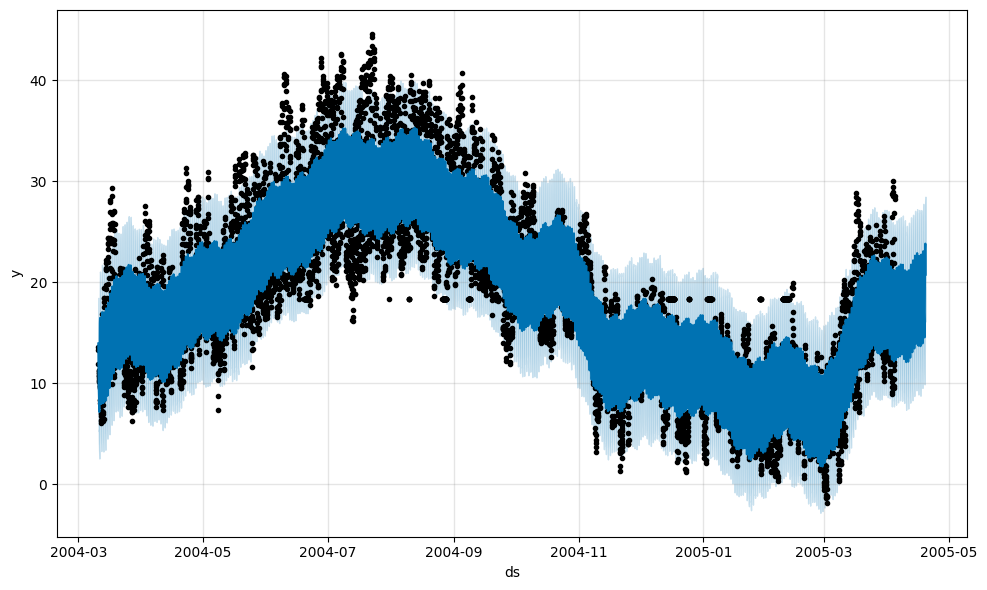

In [109]:
figure = m.plot(forecast)

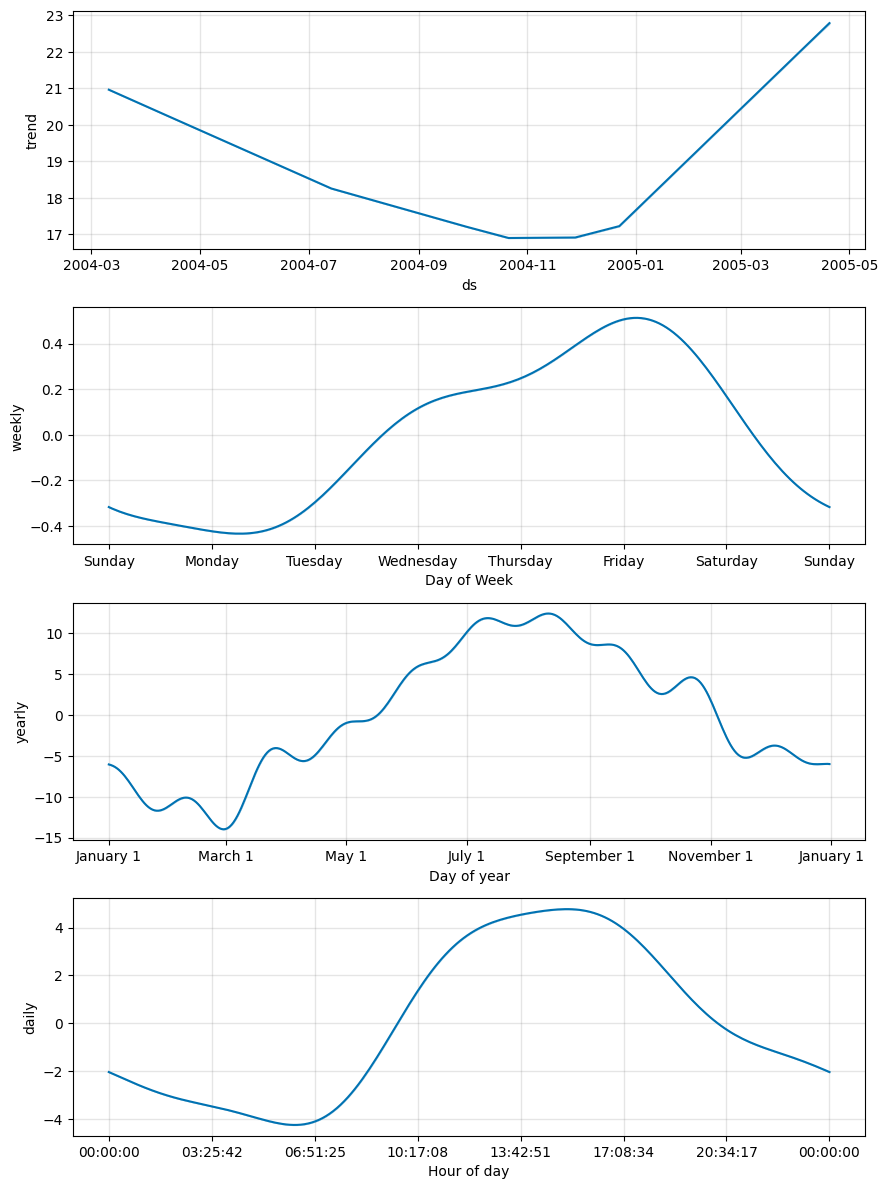

In [110]:
Figure = m.plot_components(forecast)